# Library imports

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.metrics import SCORERS
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import pickle
%matplotlib inline

# Import the train data

In [18]:
train_df = pd.read_csv('./dataset/train_V2.csv', index_col=0)

# Finding out some basic information about the dataset

In [3]:
print("Number of rows: " + str(train_df.shape[0]))
print("Number of columns: " + str(train_df.shape[1]))

Number of rows: 4446966
Number of columns: 28


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4446966 entries, 7f96b2f878858a to 0d8e7ed728b6fd
Data columns (total 28 columns):
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(3)
memory usage: 983.9+ MB


# Viewing the first 5 rows of data

In [5]:
train_df.head()

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Id,,,,,,,,,,,,,,,,,,,,,
7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


# Viewing the non-float / non-int columns

In [12]:
for each_column in train_df.columns:
    if (train_df[each_column].dtype == 'object'):
        print(train_df[each_column].head())

Id
7f96b2f878858a    4d4b580de459be
eef90569b9d03c    684d5656442f9e
1eaf90ac73de72    6a4a42c3245a74
4616d365dd2853    a930a9c79cd721
315c96c26c9aac    de04010b3458dd
Name: groupId, dtype: object
Id
7f96b2f878858a    a10357fd1a4a91
eef90569b9d03c    aeb375fc57110c
1eaf90ac73de72    110163d8bb94ae
4616d365dd2853    f1f1f4ef412d7e
315c96c26c9aac    6dc8ff871e21e6
Name: matchId, dtype: object
Id
7f96b2f878858a    squad-fpp
eef90569b9d03c    squad-fpp
1eaf90ac73de72          duo
4616d365dd2853    squad-fpp
315c96c26c9aac     solo-fpp
Name: matchType, dtype: object


# Checking the number of distinct values for the non-float / non-int columns

In [15]:
print(train_df['groupId'].nunique())
print(train_df['matchId'].nunique())
print(train_df['matchType'].nunique())

2026744
47964
16


# Removing duplicate rows

In [6]:
train_df.drop_duplicates(inplace=True)

# Removing unnecessary columns (groupId and matchId)

In [19]:
train_df.drop(columns=['matchId', 'groupId'], inplace=True)

In [20]:
train_df.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Id,,,,,,,,,,,,,,,,,,,,,
7f96b2f878858a,0,0,0.00,0,0,0,60,1241,0,0,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
eef90569b9d03c,0,0,91.47,0,0,0,57,0,0,0,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
1eaf90ac73de72,1,0,68.00,0,0,0,47,0,0,0,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
4616d365dd2853,0,0,32.90,0,0,0,75,0,0,0,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
315c96c26c9aac,0,0,100.00,0,0,0,45,0,1,1,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


# Change the matchType column to dummy variables

In [26]:
train_df = pd.get_dummies(train_df, columns=['matchType'], drop_first=True)

# Exploring the data

## 1. Checking for nulls in our values, print out column name if null values found

In [27]:
for each_column in train_df.columns:
    # If there are null values in the column
    if (train_df[each_column].isnull().values.any()):
        # Print it out
        print("Column \'" + each_column + "\'" + " has null values: " + str(train_df[each_column].isnull().values.any()))

## 1a. Removing rows with null values

## 1b. Checking if row has been successfully dropped

In [30]:
print("Number of rows: " + str(train_df.shape[0]))
print("Number of columns: " + str(train_df.shape[1]))

Number of rows: 4446965
Number of columns: 40


## 2. Visualizing the data

In [31]:
mpl.rcParams['agg.path.chunksize'] = 10000

### Kills VS Damage dealt

Text(0, 0.5, 'Amount of Damage Dealt')

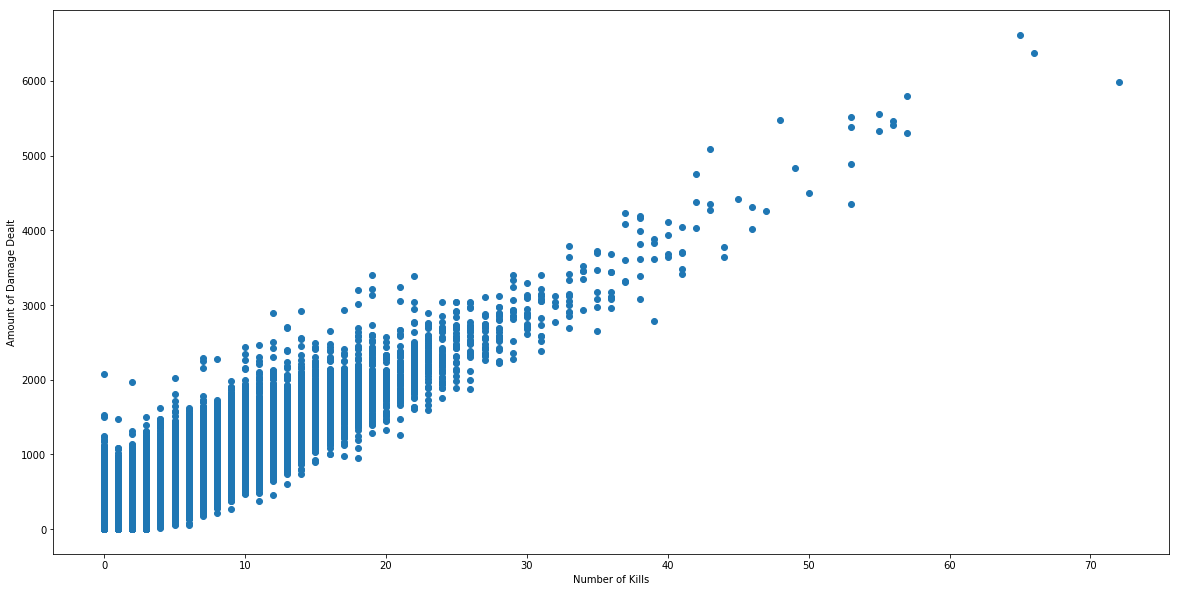

In [32]:
plt.figure(figsize=(20, 10))
plt.plot(train_df['kills'], train_df['damageDealt'], 'o')
plt.xlabel("Number of Kills")
plt.ylabel("Amount of Damage Dealt")

### Median damage dealt per kill

/Users/nelsongoh/Desktop/repos/pubg_analysis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nelsongoh/Desktop/repos/pubg_analysis/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Median Damage Dealt')

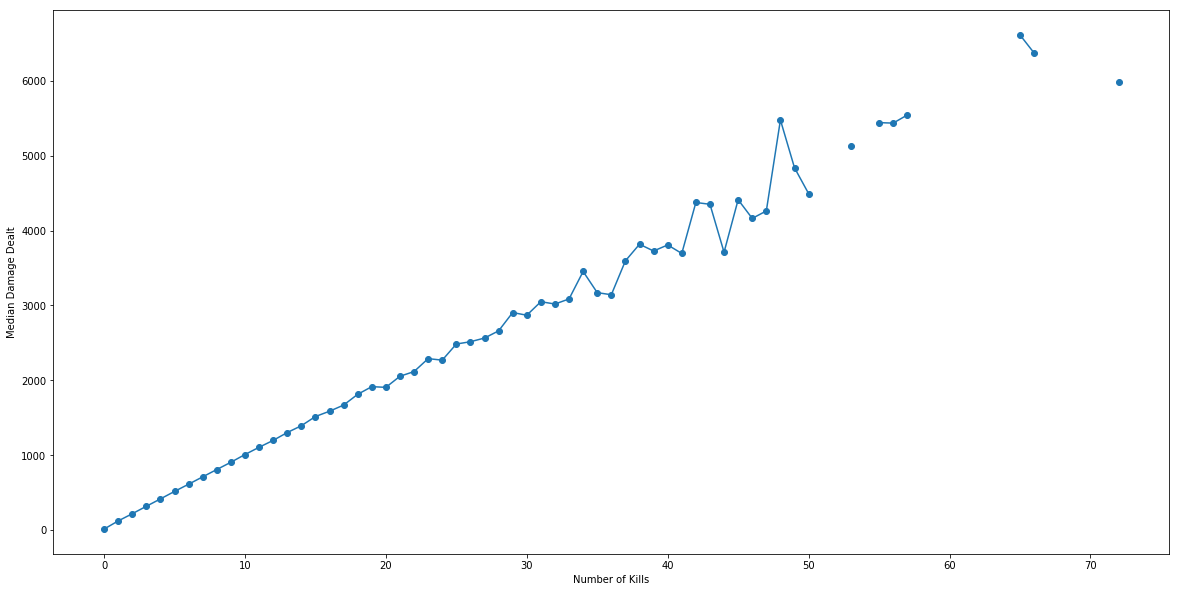

In [33]:
min_num_kills = min(train_df['kills'])
max_num_kills = max(train_df['kills'])

median_dmg_per_kill_df = pd.DataFrame(columns=['kills', 'median_dmg'])

for i in range(min_num_kills, max_num_kills + 1):
    median_dmg_per_kill_df = median_dmg_per_kill_df.append({
        'kills': i,
        'median_dmg': np.median(train_df.loc[train_df['kills'] == i]['damageDealt'])
    }, ignore_index=True)

plt.figure(figsize=(20, 10))
plt.plot(median_dmg_per_kill_df['kills'], median_dmg_per_kill_df['median_dmg'], '-o')
plt.xlabel("Number of Kills")
plt.ylabel("Median Damage Dealt")

### Number of players VS kills

/Users/nelsongoh/Desktop/repos/pubg_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


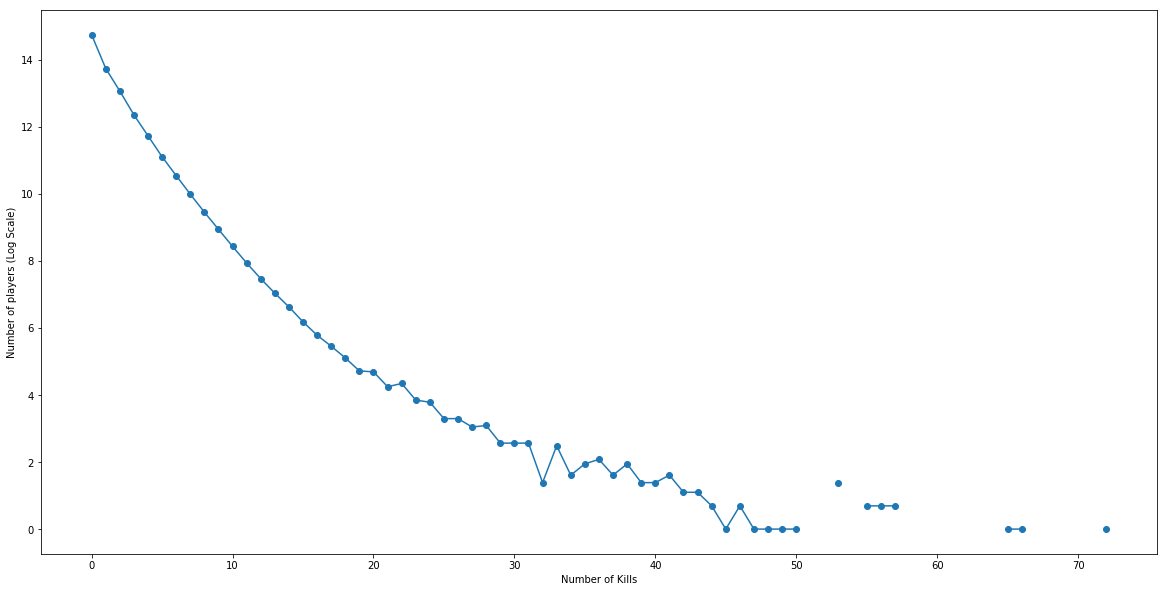

In [34]:
min_num_kills = min(train_df['kills'])
max_num_kills = max(train_df['kills'])

players_vs_kills = pd.DataFrame(columns=['kills', 'num_of_players'])

for i in range(min_num_kills, max_num_kills + 1):
    players_vs_kills = players_vs_kills.append({
        'kills': i,
        'num_of_players_log': np.log(train_df.loc[train_df['kills'] == i].shape[0])
    }, ignore_index=True)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1)
ax.plot(players_vs_kills['kills'], players_vs_kills['num_of_players_log'], '-o')
plt.xlabel("Number of Kills")
plt.ylabel("Number of players (Log Scale)")

ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))
)

### Count of winPlacePerc VS winPlacePerc values

Text(0, 0.5, 'Number of Players in Given Percentile (Log Scale)')

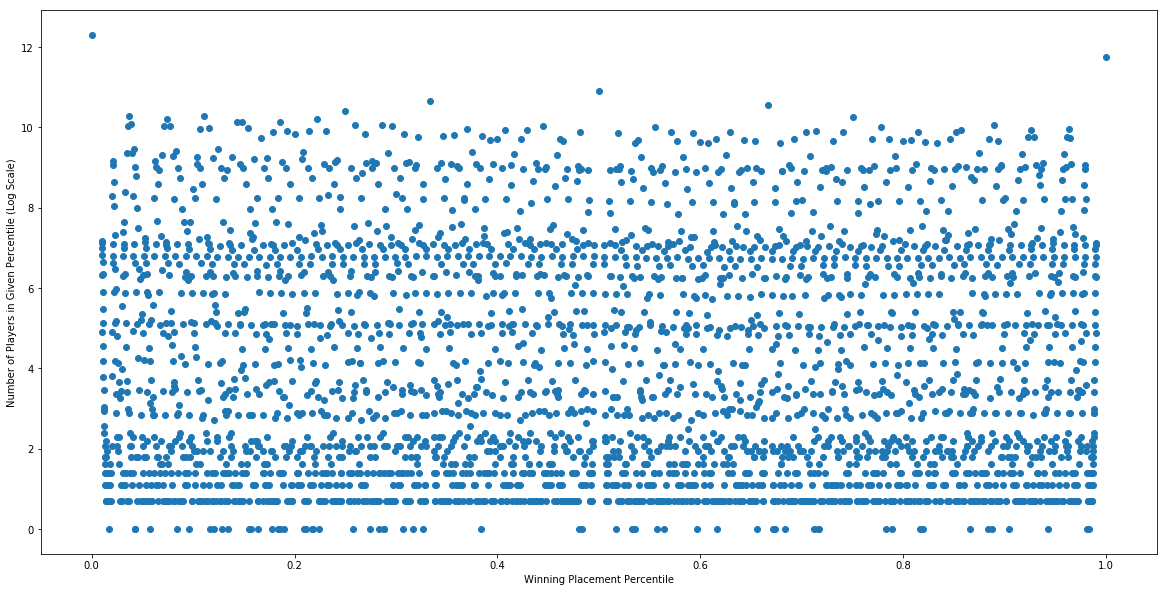

In [35]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1)
ax.plot(dict(train_df['winPlacePerc'].value_counts()).keys(), np.log(list(dict(train_df['winPlacePerc'].value_counts()).values())), 'o')
plt.xlabel("Winning Placement Percentile")
plt.ylabel("Number of Players in Given Percentile (Log Scale)")

<font color='red'><b>Since the number of players for a given Winning Placement Percentile seems evenly spread, we don't need to do stratified sampling (Is this right? - Check with Shyam)</b></font>

## Splitting the data into the independent and dependent sets, i.e. X_train and y_train

## This is for us to split the train data into 2 sets: An actual train set, and a validation set

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    train_df.drop(columns='winPlacePerc'), 
    train_df['winPlacePerc'], 
    test_size=0.2, 
    random_state=626
)

# Modelling the data with a Decision Tree

## Iterating through various tree depths to find the minimal mean squared error

We will iterate the tree through various depths, starting from 1 to 10, to find best decision tree depth with the least validation error. At each depth, we will conduct cross-validation on the training data and gather the average mean_squared_error score at that depth.

In [37]:
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [38]:
tree_depth_score_df = pd.DataFrame(columns=['depth', 'mean_mse'])

for i in range(1, 11):
    regr_dt = DecisionTreeRegressor(max_depth=i)
    score = np.mean(cross_val_score(regr_dt, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    tree_depth_score_df = tree_depth_score_df.append({
        'depth': i,
        'mean_mse': score
    }, ignore_index=True)
    
tree_depth_score_df

,depth,mean_mse
0,1.0,-0.037086
1,2.0,-0.023818
2,3.0,-0.019018
3,4.0,-0.016818
4,5.0,-0.014814
5,6.0,-0.013370
6,7.0,-0.012096
7,8.0,-0.011161
8,9.0,-0.010383
9,10.0,-0.009624


## Pick the optimal tree depth with the minimal mean squared error, train the relevant model

In [39]:
regr_dt = DecisionTreeRegressor(max_depth=10)
regr_dt.fit(X_train, y_train)

# Save the model as a Pickle file
pickle.dump(regr_dt, open('decision_tree_depth_10.pkl', 'wb'))

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [40]:
predicted = regr_dt.predict(X_test)

## Calculate the error differences between the model's predictions VS the actual

In [41]:
error_df = pd.DataFrame(columns=['model_predict_error'])
error_df['model_predict_error'] = predicted - y_test
error_df.head()

,model_predict_error
Id,
42286993d501f7,0.021627
52728c53b50611,0.053854
be6a972f51e601,0.023963
9d10aebbcfbcca,-0.104949
b990b991d01dc8,0.071809


## Plot the prediction errors

Text(0, 0.5, 'Model Prediction Error')

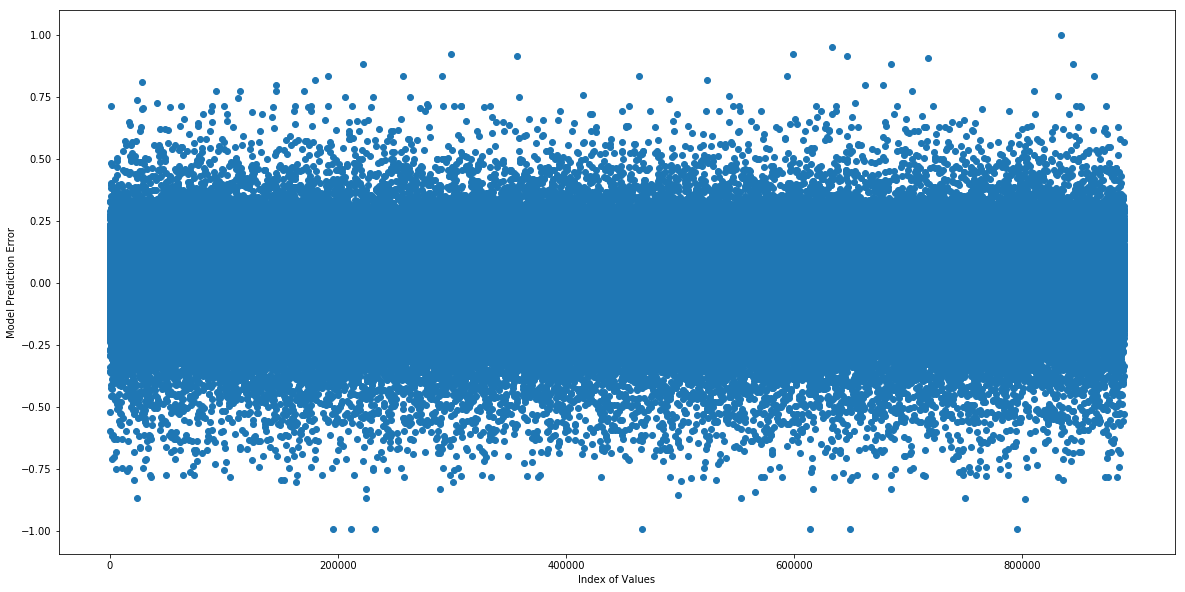

In [42]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1)
ax.plot([i for i in range(0, len(predicted))], error_df['model_predict_error'], 'o')
plt.xlabel("Index of Values")
plt.ylabel("Model Prediction Error")

## Plot the count of prediction errors, in order to find the density of errors

Text(0, 0.5, 'Count of Errors')

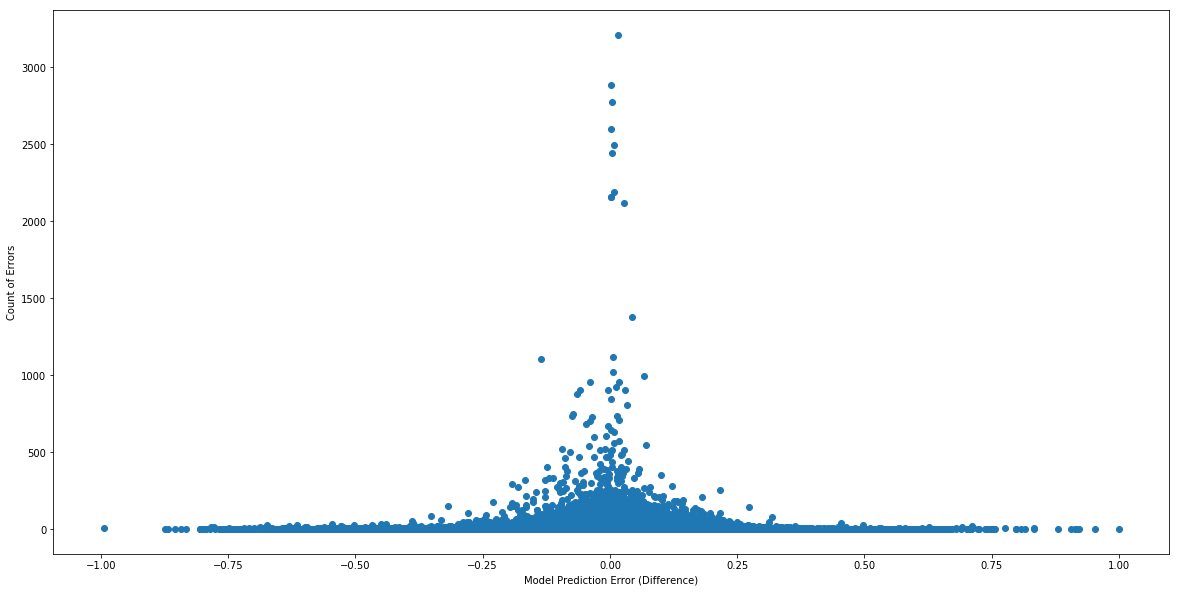

In [43]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1)
ax.plot(dict(error_df['model_predict_error'].value_counts()).keys(), list(dict(error_df['model_predict_error'].value_counts()).values()), 'o')
plt.xlabel("Model Prediction Error (Difference)")
plt.ylabel("Count of Errors")

<font color='red'><b>Need to check with Shyam regarding how to determine what error range to use.</b></font>

## Determine permutatation importance for the columns, with the Decision Tree model

1. For each column in X_test, shuffle the values within the column
2. Use the model to predict the outcomes using this dataset
3. Get the error between the predicted value against the actual
4. Plot the error on the graph
5. Reset the values to that of their original positions and repeat step 1
6. Once the values from the column have been shuffled sufficiently, proceed to the next column

The larger the errors from the shuffling of the given column's values, the more important it is as a feature to the model's predictions.

## Function to shuffle values within a column

In [44]:
def shuffle_col_vals(df, col_to_shuffle):
    _temp_df = df.copy()
    _temp_df[col_to_shuffle] = _temp_df[col_to_shuffle].sample(frac=1).values
    return _temp_df

## Steps 1 through 3, 5, and 6

In [45]:
# Retrieving the columns in the test data
X_cols = X_test.columns

# A dictionary that maps {'column_name': 'Pandas DataFrame containing a column for each iteration of shuffling,
# where each column contains values of the difference between the predicted and actual'}
col_to_shuffle_diff = {}

# Pandas DataFrame where each column contains a SINGLE value of the AVERAGED difference
# between all iterations of a feature's shuffled values, for a given feature (column name)
avg_col_diff = pd.DataFrame(columns=['col', 'mean_iteration_val', 'median_iteration_val'])

# Number of times to shuffle the column
# Currently at 33% of the number of rows in the test data
num_shuffles = int(0.33 * len(X_test))

# HARDCODED VALUE
# Set at 10 due to hardware limitations
num_shuffles = 10

# For each feature column
for each_column in X_cols:
    # Pandas DataFrame where each column contains the difference between 
    # that shuffled iteration's predicted values, and the actual values
    _df = pd.DataFrame()
    
    # For each time we shuffle the column
    for i in range(0, num_shuffles):
        # Shuffle the column values
        shuffled_test_df = shuffle_col_vals(X_test, each_column)

        # Make a prediction with the shuffled values
        predicted_shuffle = regr_dt.predict(shuffled_test_df)

        # Obtain the difference between the predicted values and the actual values
        _df[each_column + '_v' + str(i)] = predicted_shuffle - y_test
        
    col_to_shuffle_diff[each_column] = _df

# Obtaining the median and average values for each column's iterations

In [54]:
for each_column in col_to_shuffle_diff:
    mean_iter_val = 0.0
    median_iter_val = 0.0
    
    for each_iter_col in col_to_shuffle_diff[each_column].columns:
        mean_iter_val += np.mean(col_to_shuffle_diff[each_column][each_iter_col])
        median_iter_val += np.median(col_to_shuffle_diff[each_column][each_iter_col])
        
    mean_iter_val /= 10.0
    median_iter_val /= 10.0
    
    avg_col_diff = avg_col_diff.append({
        'col': each_column,
        'mean_iteration_val': mean_iter_val,
        'median_iteration_val': median_iter_val
    }, ignore_index=True)

# Get the absolute error value, ignoring signs

In [79]:
avg_col_diff['median_iteration_abs_val'] = None
avg_col_diff['mean_iteration_abs_val'] = None
avg_col_diff['median_iteration_abs_val'] = np.abs(avg_col_diff['median_iteration_val'])
avg_col_diff['mean_iteration_abs_val'] = np.abs(avg_col_diff['mean_iteration_val'])

# Step 4: Plotting the errors on a graph

Text(0, 0.5, 'Error Difference')

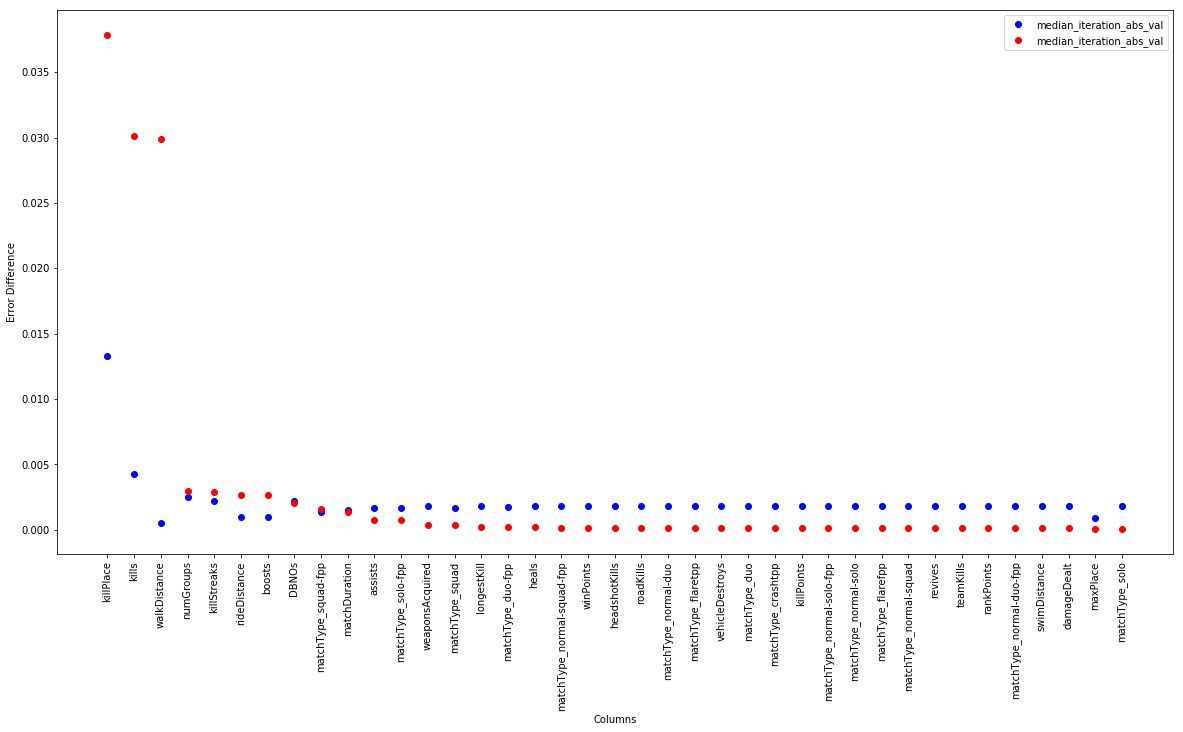

In [80]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1)
ax.plot(
    avg_col_diff['col'], avg_col_diff['median_iteration_abs_val'], 'bo',
    avg_col_diff['col'], avg_col_diff['mean_iteration_abs_val'], 'ro',
)
ax.legend()
plt.xlabel("Columns")
plt.xticks(avg_col_diff['col'], avg_col_diff['col'], rotation='vertical')
plt.ylabel("Error Difference")

From the chart produced in Step 4, we can see that the important columns are as follows:

If we're considering the <b>MEDIAN</b> error values, then in order of greatest importance, the columns are:
1. killPlace
2. kills
3. walkDistance
4. numGroups
5. killStreaks
6. rideDistance
7. boosts
8. DBNOs
9. matchType_squad-fpp
10. matchDuration
11. assists
12. matchType_solo-fpp

If we're considering the <b>MEAN</b> error values, then in order of greatest importance, the columns are:
1. killPlace
2. kills
3. numGroups
4. killStreaks
5. DBNOs